<a href="https://colab.research.google.com/github/Nikkiie/Covid-tweet-sentiment-analysis-Classification/blob/main/Covid_19_Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE - Sentiment Analysis : Predicting sentiment of COVID-19 tweets**

# **PROBLEM DESCRIPTION**

**This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.**

**The names and usernames have been given codes to avoid any privacy concerns.**

**The features present in the data are --**



1- Username

2- ScreenName

3- Location

4- TweetAt

5- OriginalTweet

6- Sentiment

# **IMPORTING LIBRARIES**

In [2]:
# Importing Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')


from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import make_scorer,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
# Importing libraries for text-preprocessing and NLP

# **Loading the dataset**

In [3]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Giving the file path

file_path = ('/content/drive/MyDrive/Cap-3/Coronavirus Tweets.csv')
df = pd.read_csv(file_path, encoding = 'ISO-8859-1')

**Dataset First view**

In [ ]:
# Checking top 5 rows in dataframe
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
# Checking last 5 rows in dataframe
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


**Dataset Rows & Columns count**

In [ ]:
# Data shape
df.shape

(41157, 6)

In [ ]:
#Check all the coloumns present in our dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

**Dataset Information**

In [ ]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**Duplicate Values**

In [ ]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


**Checking Unique Value**

In [ ]:
# Looking for unique values in columns of dataset
for i in df.columns:
  print("Total Unique Values in", i, "-", len(df[i].unique()))

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12221
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


# **Null Value Analysis-**

In [ ]:
# Checking null value
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [5]:
# Importing missingo
import missingno as msno

In [6]:
# 1-step make the list of features which has missing values
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
# 2-step print the feature name and the percentage of missing values
for feature in feature_with_na:
  print(feature, np.round(df[feature].isnull().mean(), 4)*100,  " % missing values")

Location 20.87  % missing values


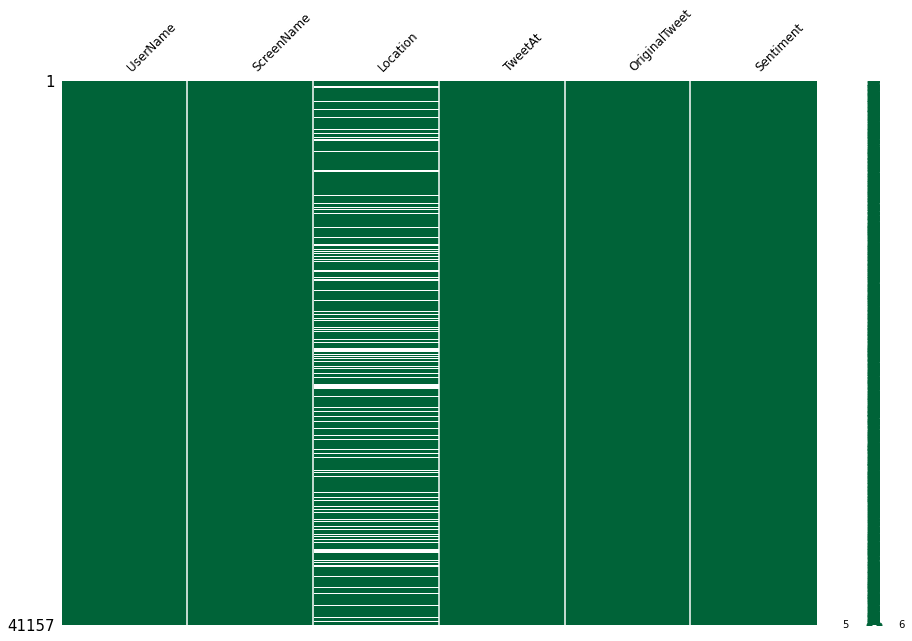

In [7]:
msno.matrix(df, figsize=(15,10), fontsize=12, color=(0, 0.39, 0.22));

# **Exploratory Data Analysis**

**When did the Tweets Started ?**

In [ ]:
# Count value of TweetAt 
df['TweetAt'].value_counts()

In [9]:
# Describing TweetAt
df.TweetAt.describe()

count          41157
unique            30
top       20-03-2020
freq            3448
Name: TweetAt, dtype: object

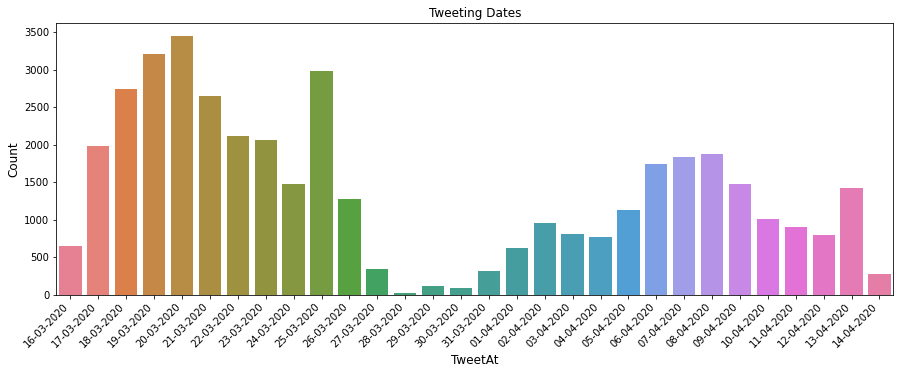

In [10]:
# Distribution of Tweets Date
plt.figure(figsize=(15,5))
sns.countplot(x='TweetAt', data=df, palette ="husl")
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Dates")
plt.ylabel("Count", fontsize = 12)
plt.xlabel("TweetAt",fontsize = 12)
plt.show()

* The above count plot shows the overall distribution of different tweeting dates in the dataset. Starting from mid-month of March 2020 to mid-month of April 2020.

* We can see that the date 20-03-2020 has the maximum count value among all the other occuring dates.

* The tweeting date ranges from 16-03-2020 to 14-04-2020, which is approx 30 days in total

* Least count value is for date 28-03-2020.



**Origins of Tweets and Top Tweeter Locations-**

In [11]:
# Looking the count value of different Location 
df.Location.value_counts().head(15)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Name: Location, dtype: int64

In [ ]:
# Describing the Location 
df.Location.describe()

count      32567
unique     12220
top       London
freq         540
Name: Location, dtype: object

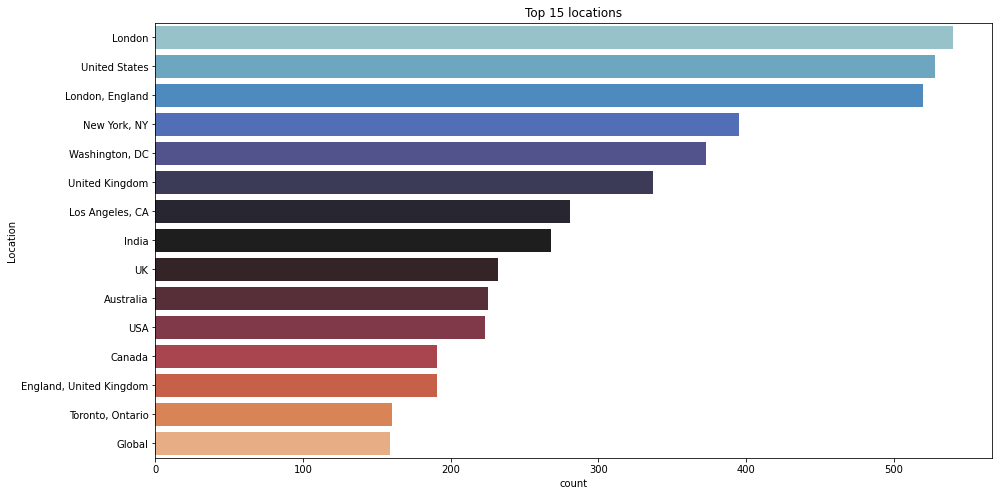

In [12]:
# Looking for top 15 Countries in Countplot
plt.figure(figsize=(15,8))
sns.countplot(y = df.Location, order = df.Location.value_counts().iloc[:15].index, palette ='icefire')
plt.title('Top 15 locations')
plt.show()

* The above count plot shows the top 15 locations in the dataset.

* London being the most tweeting locatioin from the bunch.

* We can see some peculiarity in the dataset i.e. "London" and "London, England" are represented as two different locations. This can be ignored as this wont be helping in the Sentiment Analysis process.

* Second place is of United States and India ranks at 8th place.

# **Sentiment Analysis-**

In [13]:
# Describing the sentiments
df.Sentiment.describe()

count        41157
unique           5
top       Positive
freq         11422
Name: Sentiment, dtype: object

In [14]:
# Checking unique values in Sentiment
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [15]:
# Data has 5 classes of Sentiments, hence we are converting them into 3
def conversion(x):

  if x == 'Extremely Positive':
    return "Positive"
  if x == 'Positive':
    return "Positive"   
  elif x == "'Extremely Negative":
    return "Negative"  
  elif x == "Negative":  
    return "Negative"  
  else:
    return "Neutral" 

df["Sentiment"] = df["Sentiment"].apply(lambda x : conversion(x))    

df.Sentiment.value_counts()

Positive    18046
Neutral     13194
Negative     9917
Name: Sentiment, dtype: int64

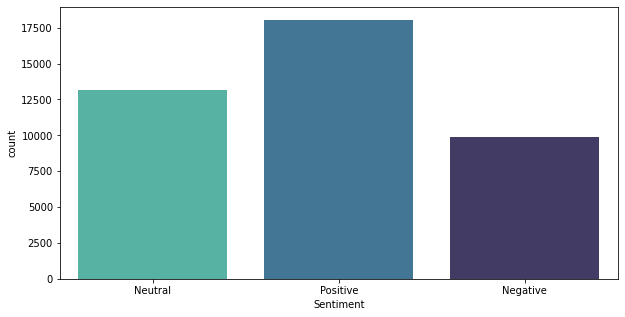

In [30]:
plt.subplots(figsize=(10,5))
sns.countplot(x='Sentiment', data = df, palette="mako_r")


**Number of characters of each sentiments types**

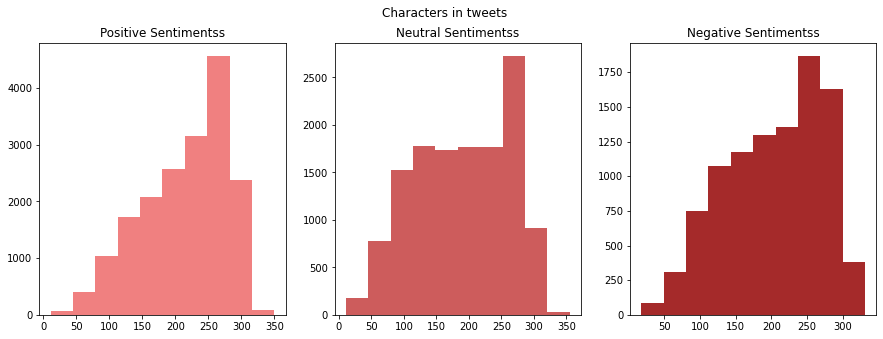

In [44]:
# Histogram
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

# Histogram for Positive Sentiments
tweet_len= df[df['Sentiment'] == "Positive"]["OriginalTweet"].str.len()
ax1.hist(tweet_len,color='lightcoral')
ax1.set_title('Positive Sentimentss')

# Histogram for Neutral Sentiments
tweet_len=df[df['Sentiment']=="Neutral"]['OriginalTweet'].str.len()
ax2.hist(tweet_len,color='indianred')
ax2.set_title('Neutral Sentimentss')

# Histogram for Negative Sentiments
tweet_len=df[df['Sentiment']=="Negative"]['OriginalTweet'].str.len()
ax3.hist(tweet_len,color='brown')
ax3.set_title('Negative Sentimentss')



fig.suptitle('Characters in tweets')
plt.show()

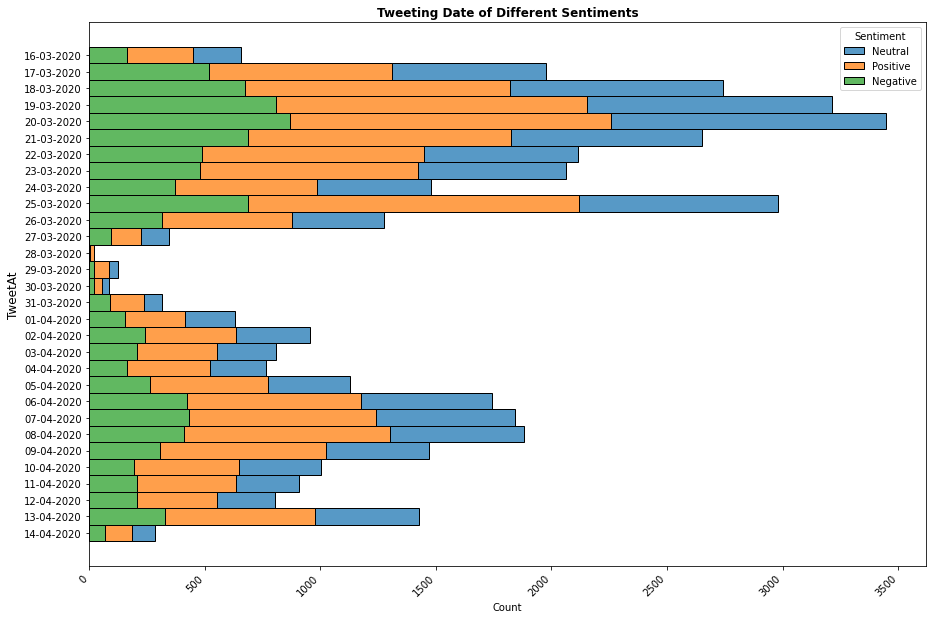

In [28]:
# Plotting Tweet date with different sentiments
plt.figure(figsize=(15,10))
sns.histplot(data = df, y= "TweetAt", hue="Sentiment", multiple="stack")
plt.xticks(rotation=45, ha='right')
plt.title("Tweeting Date of Different Sentiments", fontweight='bold')
plt.ylabel("TweetAt",fontsize = 12)
plt.show()

**Punctuations**

In [33]:
# Dwonloading stopwords from nltk library 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
from collections import defaultdict
dic=defaultdict(int)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
# Function to create a corpus 
def create_corpus(target):
    corpus=[] 
    for x in df[df['Sentiment']==target ]['OriginalTweet'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 27 artists>

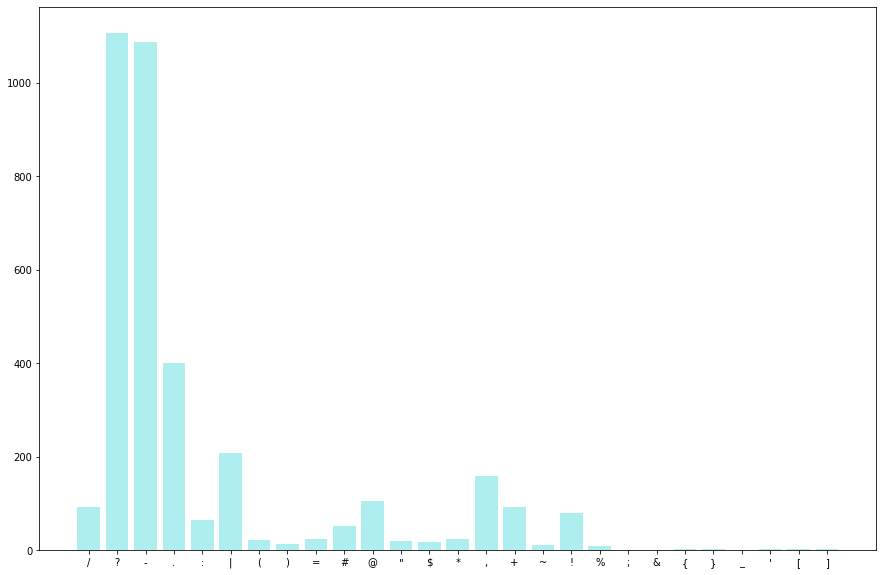

In [38]:
# Punctuations in Positive sentiments
plt.figure(figsize=(15,10))
corpus=create_corpus("Positive")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='paleturquoise')

<BarContainer object of 26 artists>

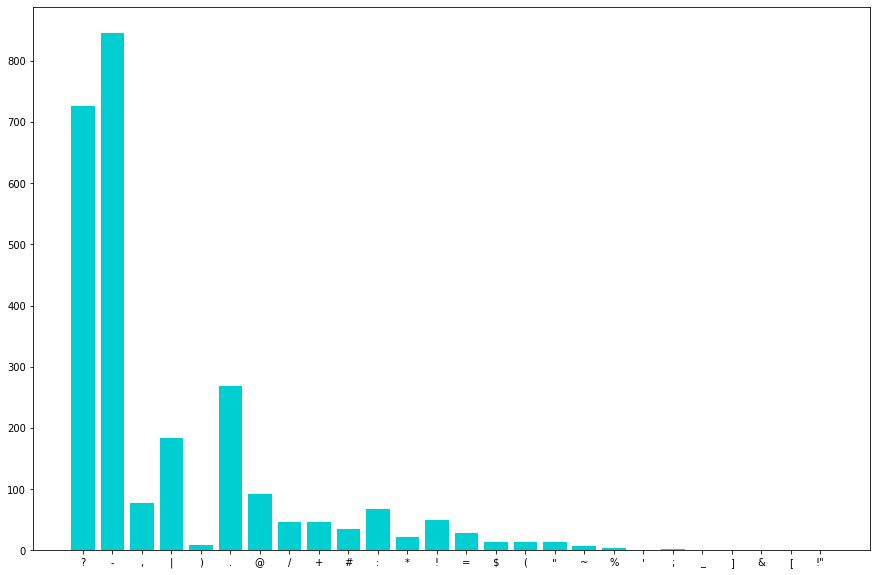

In [37]:
# Punctuations in Neutral sentiments
plt.figure(figsize=(15,10))
corpus=create_corpus("Neutral")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

        
x,y=zip(*dic.items())
plt.bar(x,y,color='darkturquoise')

<BarContainer object of 23 artists>

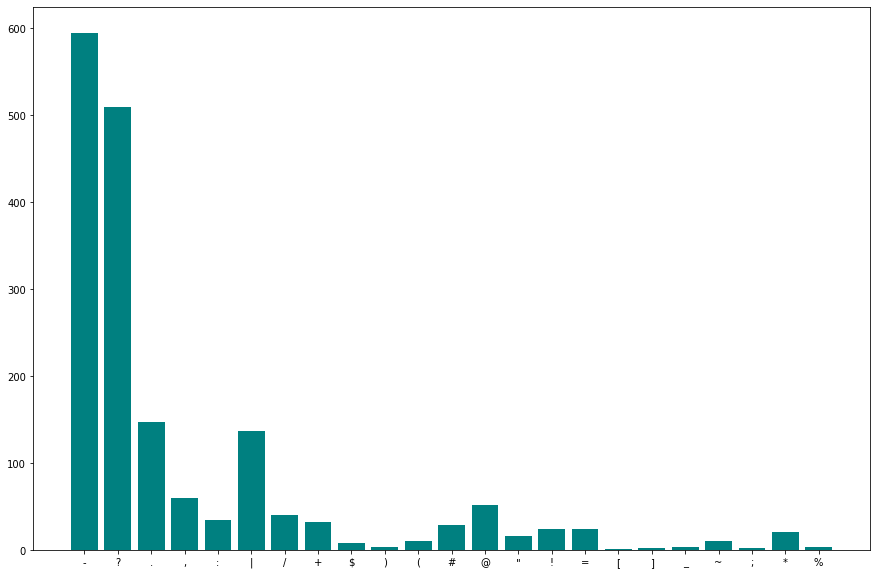

In [40]:
# Punctuations in Negative sentiments
plt.figure(figsize=(15,10))
corpus=create_corpus("Negative")

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
                
x,y=zip(*dic.items())
plt.bar(x,y, color='teal')